**SALES PREDICTION MODEL

In [1]:
#LOADING DEPENDENCIES
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics #df = pd.merge(df,stores_df,how = 'Bottom',on = ['Store'])
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder

In [2]:
#LOAD TRAIN DATASET
df = pd.read_csv('C:/Users/USER/Pictures/Data/Wtrain.csv')

#LOAD FEATURES DATASET AND JOIN IT WITH TRAIN DATA
df.head()
#LOAD STORE DATASET AND JOIN WITH ABOVE DATA
print(df.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [3]:
features_df = pd.read_csv('C:/Users/USER/Pictures/Data/features.csv')
features_df =features_df.drop(['IsHoliday'],axis=1)
df=df.merge(features_df, how='left', on=['Store','Date'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [4]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [5]:
stores_df = pd.read_csv('C:/Users/USER/Pictures/Data/stores.csv')
df=df.merge(stores_df, how='left', on=['Store'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [6]:
dat= pd.to_datetime(df['Date'])
df['week_number_new']= dat.dt.isocalendar().week

In [7]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week_number_new
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week_number_new
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9


In [8]:
# Getting year value
df['Year'] = dat.dt.isocalendar().year
df['month_number'] = dat.dt.month

In [9]:
df['day']= dat.dt.day

In [10]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week_number_new,Year,month_number,day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010,2,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010,2,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010,2,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010,3,5


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week_number_new,Year,month_number,day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010,2,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010,2,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010,2,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010,3,5


In [11]:
df = pd.get_dummies(df, columns=['IsHoliday'])

In [12]:
df.shape

(421570, 21)

(421570, 21)

In [13]:
df=df.drop('IsHoliday_False',axis=1) #no need as true is there

In [14]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week_number_new,Year,month_number,day,IsHoliday_True
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.0,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,25.826762,2010.968591,6.449510,15.673131,0.070358
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,14.151887,0.796876,3.243217,8.753549,0.255750
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.0,2010.0,1.000000,1.000000,0.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,14.0,2010.0,4.000000,8.000000,0.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,26.0,2011.0,6.000000,16.000000,0.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,38.0,2012.0,9.000000,23.000000,0.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.0,2012.0,12.000000,31.000000,1.000000


,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week_number_new,Year,month_number,day,IsHoliday_True
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.0,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,25.826762,2010.968591,6.449510,15.673131,0.070358
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,14.151887,0.796876,3.243217,8.753549,0.255750
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.0,2010.0,1.000000,1.000000,0.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,14.0,2010.0,4.000000,8.000000,0.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,26.0,2011.0,6.000000,16.000000,0.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,38.0,2012.0,9.000000,23.000000,0.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.0,2012.0,12.000000,31.000000,1.000000


In [16]:
# Using + operator to combine two columns
#df["P"] = df['Temperature'] +"-"+ df["Fuel_Price"]
#print(df)


In [17]:
#EXPLORING THE RANGE OF DATES FOR WHICH THE WEEKLY SALES DATA IS AVAILABLE.
print('Min Date in Data is - {}'.format(df['Date'].min()))
print('Max Date in Data is - {}'.format(df['Date'].max()))

Min Date in Data is - 2010-02-05
Max Date in Data is - 2012-10-26
Min Date in Data is - 2010-02-05
Max Date in Data is - 2012-10-26


FILLING EMPTY SPACES

In [18]:
#IMPUTE NULL VALUES
df['MarkDown1'] = df['MarkDown1'].fillna(df['MarkDown1'].mean())
df['MarkDown2'] = df['MarkDown2'].fillna(df['MarkDown2'].mean())
df['MarkDown3'] = df['MarkDown3'].fillna(df['MarkDown3'].mean())
df['MarkDown4'] = df['MarkDown4'].fillna(df['MarkDown4'].mean())
df['MarkDown5'] = df['MarkDown5'].fillna(df['MarkDown5'].mean())

In [19]:
df.isnull().sum()

Store              0
Dept               0
Date               0
Weekly_Sales       0
Temperature        0
Fuel_Price         0
MarkDown1          0
MarkDown2          0
MarkDown3          0
MarkDown4          0
MarkDown5          0
CPI                0
Unemployment       0
Type               0
Size               0
week_number_new    0
Year               0
month_number       0
day                0
IsHoliday_True     0
dtype: int64

Store              0
Dept               0
Date               0
Weekly_Sales       0
Temperature        0
Fuel_Price         0
MarkDown1          0
MarkDown2          0
MarkDown3          0
MarkDown4          0
MarkDown5          0
CPI                0
Unemployment       0
Type               0
Size               0
week_number_new    0
Year               0
month_number       0
day                0
IsHoliday_True     0
dtype: int64

In [20]:
df.tail()


,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week_number_new,Year,month_number,day,IsHoliday_True
421565,45,98,2012-09-28,508.37,64.88,3.997,4556.61,20.640000,1.50,1601.01,3288.25,192.013558,8.684,B,118221,39,2012,9,28,0
421566,45,98,2012-10-05,628.10,64.89,3.985,5046.74,3334.628621,18.82,2253.43,2340.01,192.170412,8.667,B,118221,40,2012,10,5,0
421567,45,98,2012-10-12,1061.02,54.47,4.000,1956.28,3334.628621,7.89,599.32,3990.54,192.327265,8.667,B,118221,41,2012,10,12,0
421568,45,98,2012-10-19,760.01,56.47,3.969,2004.02,3334.628621,3.18,437.73,1537.49,192.330854,8.667,B,118221,42,2012,10,19,0
421569,45,98,2012-10-26,1076.80,58.85,3.882,4018.91,58.080000,100.00,211.94,858.33,192.308899,8.667,B,118221,43,2012,10,26,0


,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week_number_new,Year,month_number,day,IsHoliday_True
421565,45,98,2012-09-28,508.37,64.88,3.997,4556.61,20.640000,1.50,1601.01,3288.25,192.013558,8.684,B,118221,39,2012,9,28,0
421566,45,98,2012-10-05,628.10,64.89,3.985,5046.74,3334.628621,18.82,2253.43,2340.01,192.170412,8.667,B,118221,40,2012,10,5,0
421567,45,98,2012-10-12,1061.02,54.47,4.000,1956.28,3334.628621,7.89,599.32,3990.54,192.327265,8.667,B,118221,41,2012,10,12,0
421568,45,98,2012-10-19,760.01,56.47,3.969,2004.02,3334.628621,3.18,437.73,1537.49,192.330854,8.667,B,118221,42,2012,10,19,0
421569,45,98,2012-10-26,1076.80,58.85,3.882,4018.91,58.080000,100.00,211.94,858.33,192.308899,8.667,B,118221,43,2012,10,26,0


EDA

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

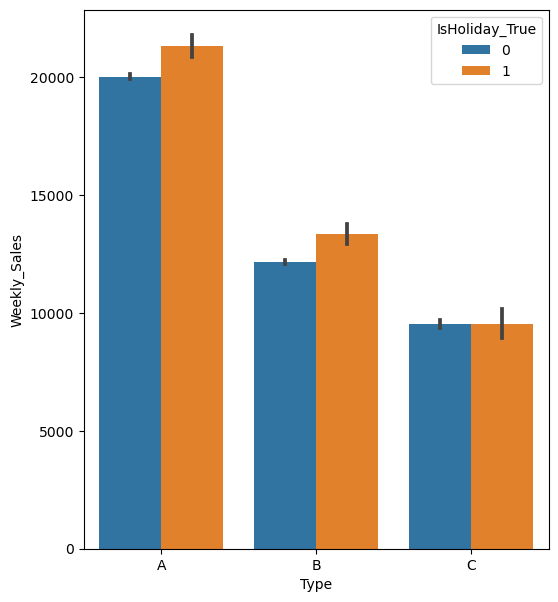

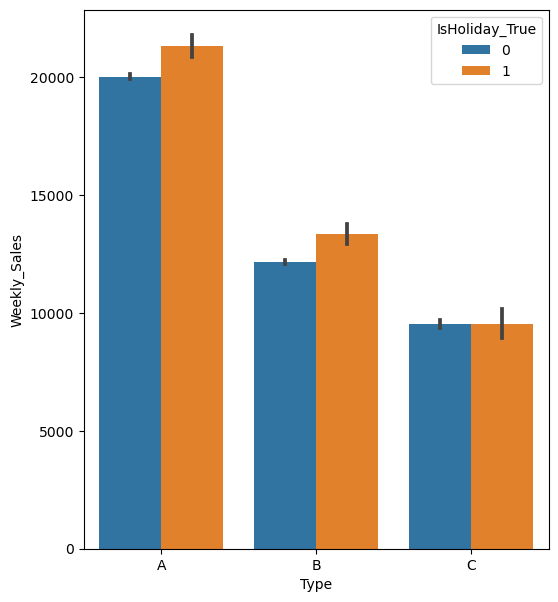

In [21]:
#SIZE DISTRIBUTION OF THE STORES FOR EACH STORE TYPE
plt.figure(figsize = (6,7))
sns.barplot(x = 'Type', y ='Weekly_Sales',data = df,hue='IsHoliday_True') #there is a slight more sales on holidays in type A&B there is equal sales in Type c

  Type  Size
0    A    21
1    B    17
2    C     4
  Type  Size
0    A    21
1    B    17
2    C     4


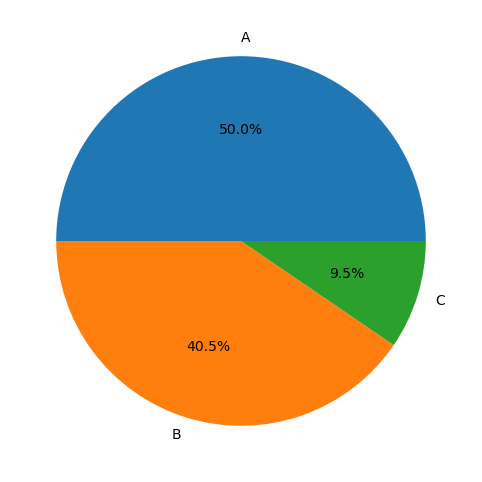

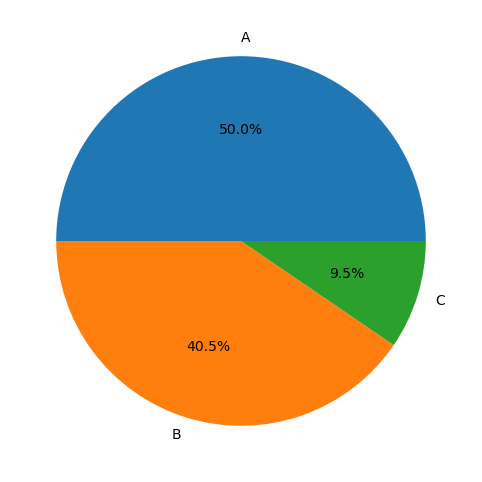

In [22]:
temp = pd.DataFrame(df.groupby('Type')['Size'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (8,6))
plt.pie(temp['Size'],labels = temp['Type'],autopct='%1.1f%%')
plt.show()  #there are stores of type A>type B> Type C

  Type  Store
0    A     22
1    B     17
2    C      6
  Type  Store
0    A     22
1    B     17
2    C      6


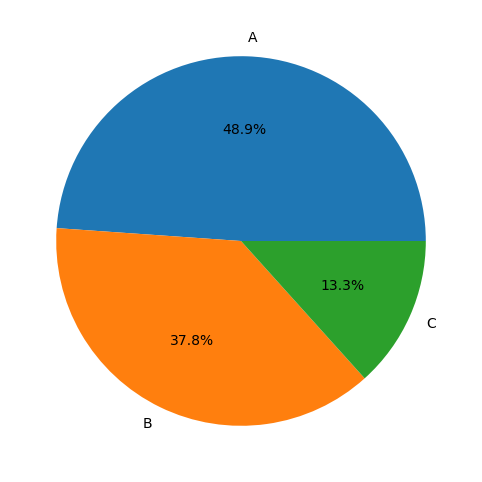

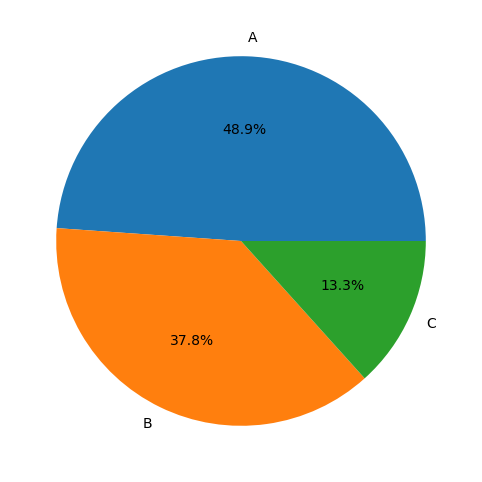

In [23]:
temp = pd.DataFrame(df.groupby('Type')['Store'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (8,6))
plt.pie(temp['Store'],labels = temp['Type'],autopct='%1.1f%%')
plt.show()  #there are stores of type A>type B> Type C

<Axes: xlabel='MarkDown5', ylabel='Weekly_Sales'>

<Axes: xlabel='MarkDown5', ylabel='Weekly_Sales'>

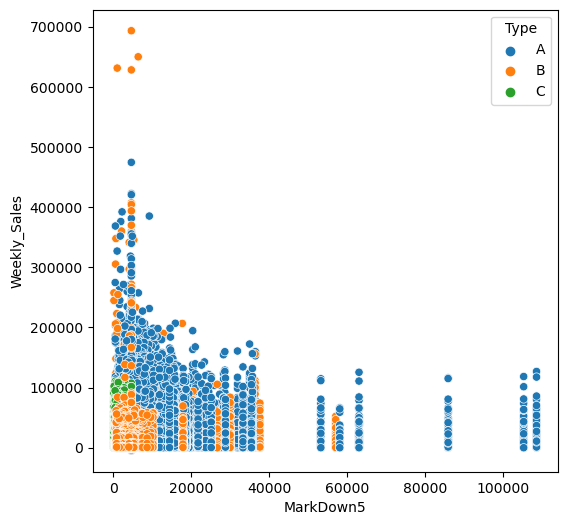

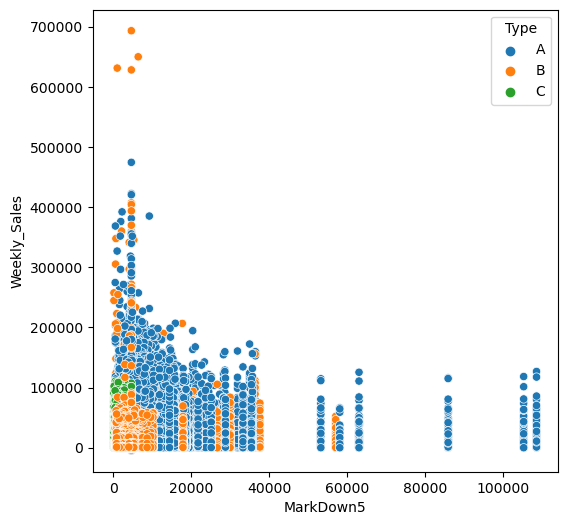

In [24]:
#DISTRIBUTION OF WEEKLY SALES BASED ON STORE TYPE
plt.figure(figsize = (6,6))
sns.scatterplot(x ='MarkDown5',y = 'Weekly_Sales',data = df,hue='Type')

In [25]:
df['Year'].mode()
array=np.asarray(df['month_number'])
array1=np.asarray(df['Year'])
array2=np.asarray(df['Weekly_Sales'])
a=[]
b=[]

<Axes: >

<Axes: >

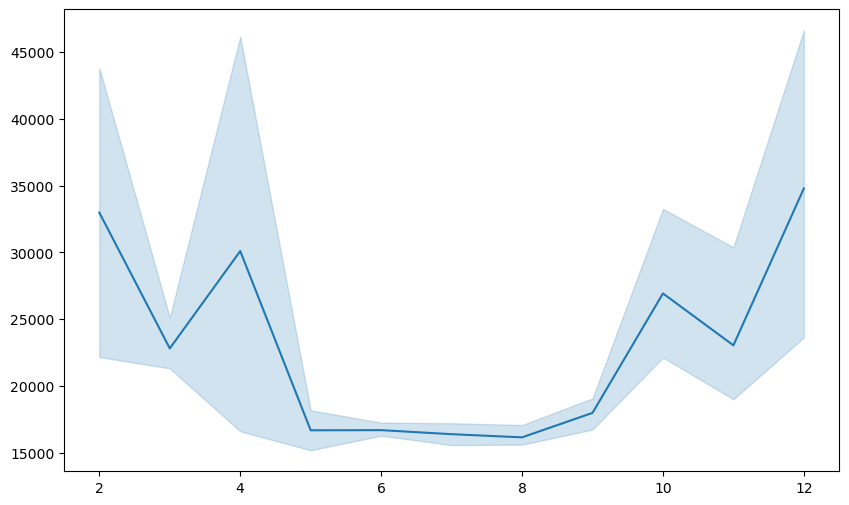

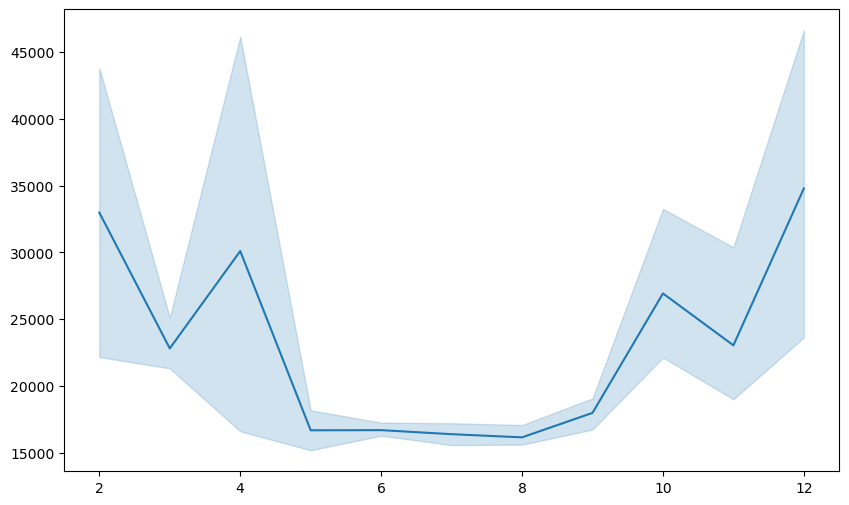

In [26]:
for i in range(0,52):
    if(array1[i]==2010):
        a.append(array[i])
        b.append(array2[i])
plt.figure(figsize = (10,6))
sns.lineplot(x =a,y =b)    #

<Axes: >

<Axes: >

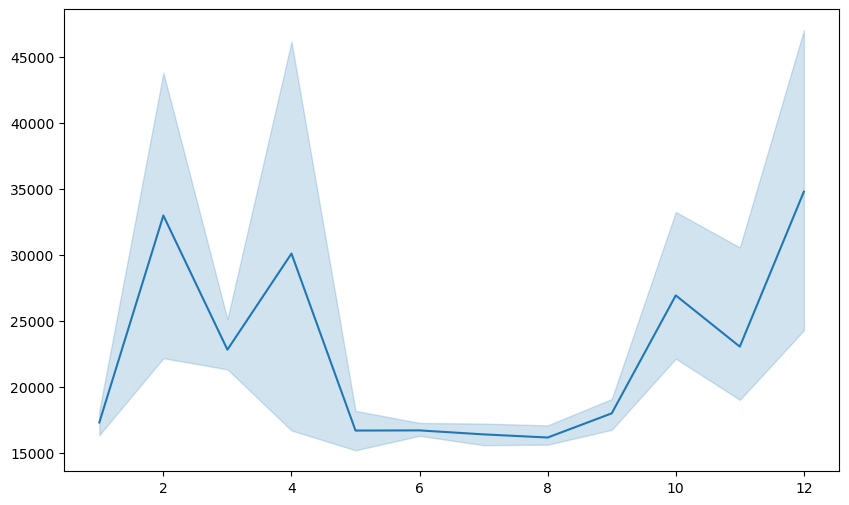

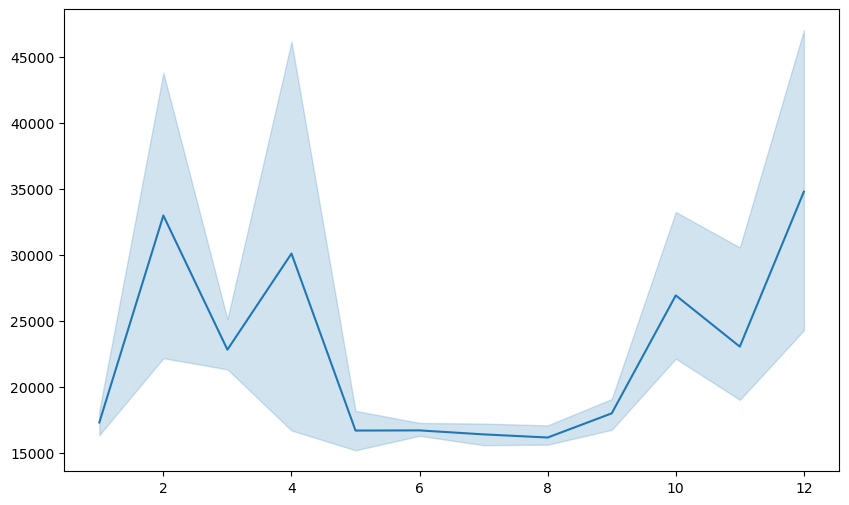

In [27]:
for i in range(0,52):
    if(array1[i]==2011):
        a.append(array[i])
        b.append(array2[i])
plt.figure(figsize = (10,6))
sns.lineplot(x =a,y =b)    #

<Axes: >

<Axes: >

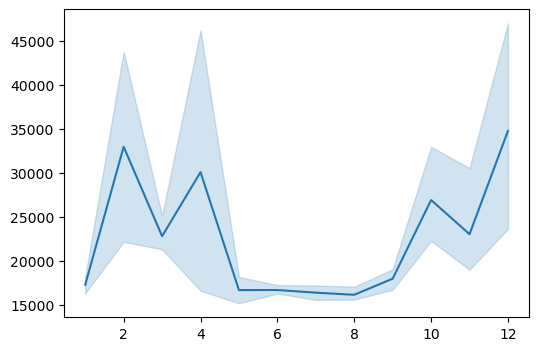

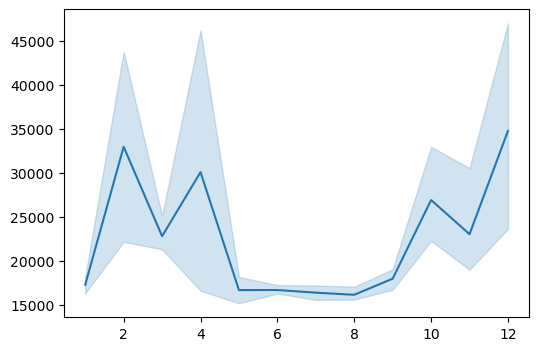

In [28]:
for i in range(0,43):
    if(array1[i]==2012):
        a.append(array[i])
        b.append(array2[i])
plt.figure(figsize =(6,4))
sns.lineplot(x=a,y=b)    #

<Axes: xlabel='Size', ylabel='Weekly_Sales'>

<Axes: xlabel='Size', ylabel='Weekly_Sales'>

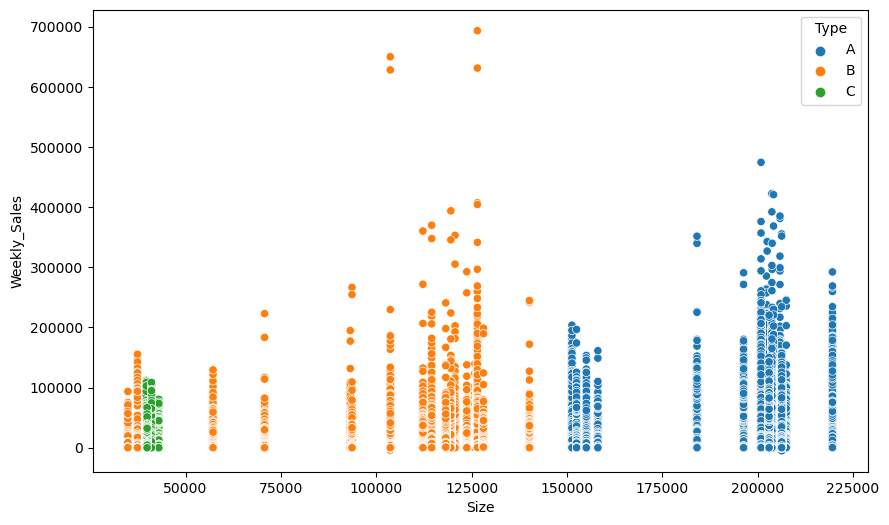

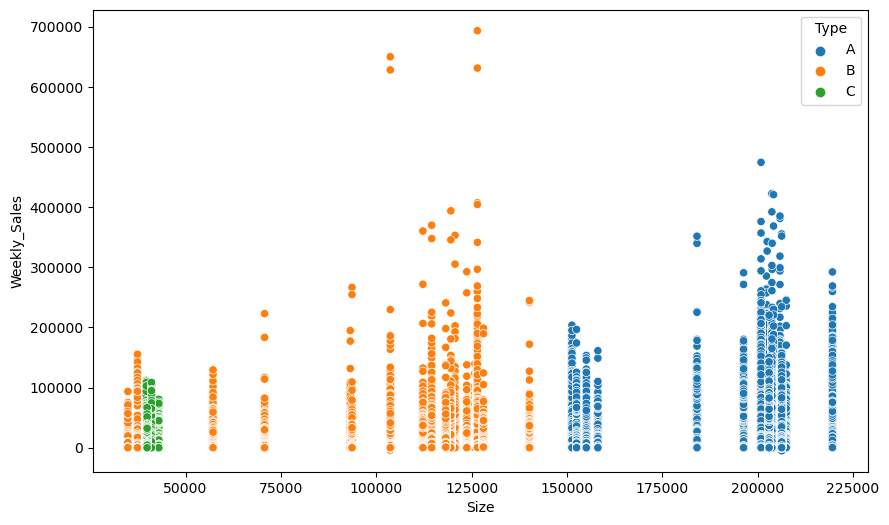

In [29]:
plt.figure(figsize =(10,6))
sns.scatterplot(y='Weekly_Sales',x='Size',data=df,hue='Type') #type size sales

In [30]:
print(df['Weekly_Sales'].mean())
print(df['CPI'].mean())

15981.25812346704
171.20194682296346
15981.25812346704
171.20194682296346


In [31]:
array=np.asarray(df['CPI'])
array3=np.asarray(df['month_number'])

<Axes: >

<Axes: >

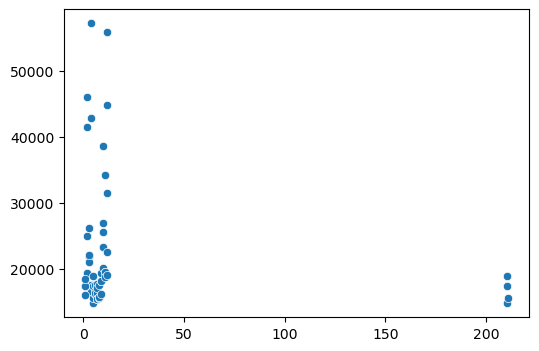

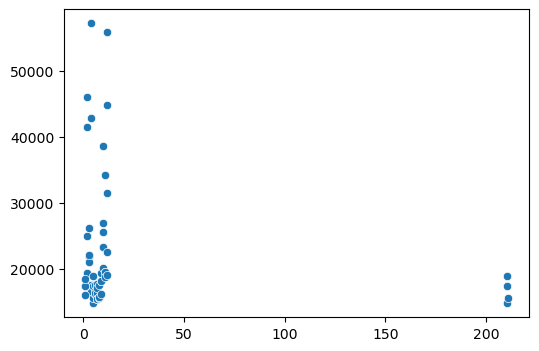

In [32]:
#
for i in range(0,52):
    if(array1[i]==2010):
        if(array3[i]==5):
            a.append(array[i])
            b.append(array2[i])
plt.figure(figsize =(6,4))
sns.scatterplot(x=a,y=b) 

<Axes: >

<Axes: >

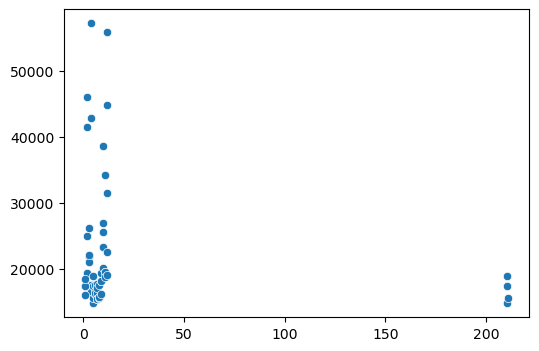

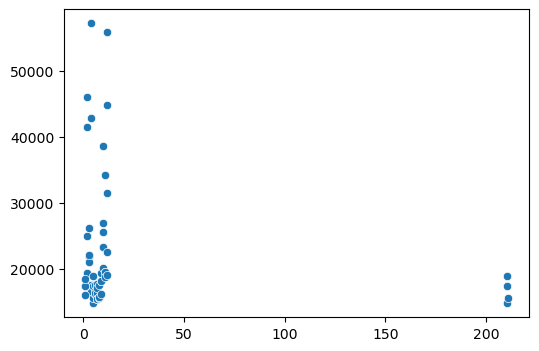

In [33]:
for i in range(0,52):
    if(array[i]==2011):
        a.append(array[i])
        b.append(array2[i])
plt.figure(figsize =(6,4))
sns.scatterplot(x=a,y=b) 

<Axes: >

<Axes: >

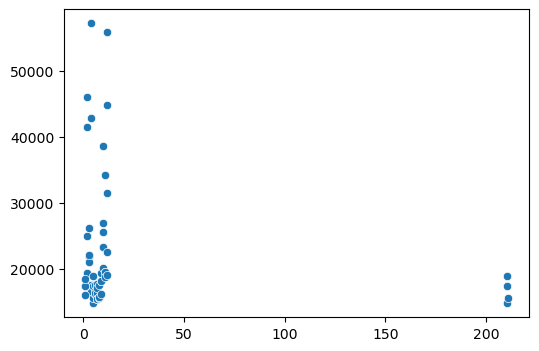

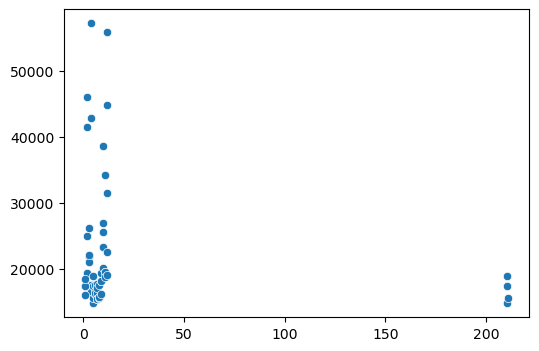

In [34]:
for i in range(0,42):
    if(array1[i]==2012):
        a.append(array[i])
        b.append(array2[i])
plt.figure(figsize =(6,4))
sns.scatterplot(x=a,y=b) 

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

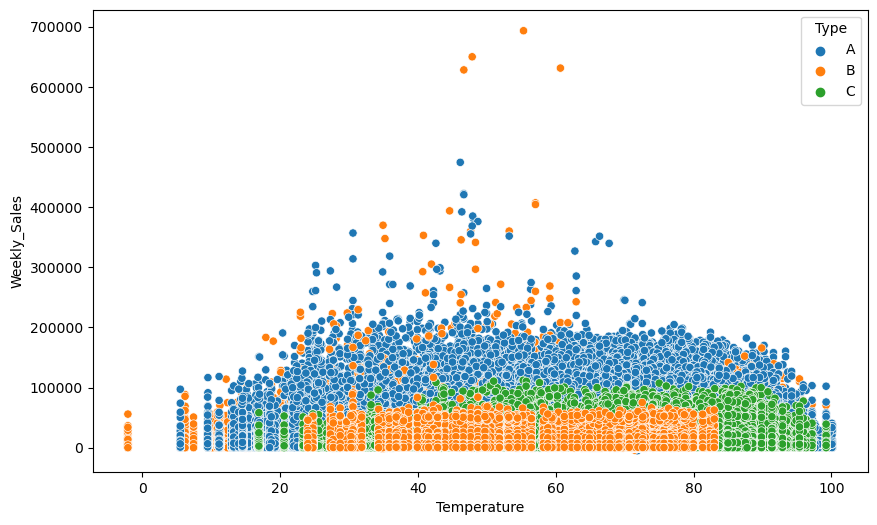

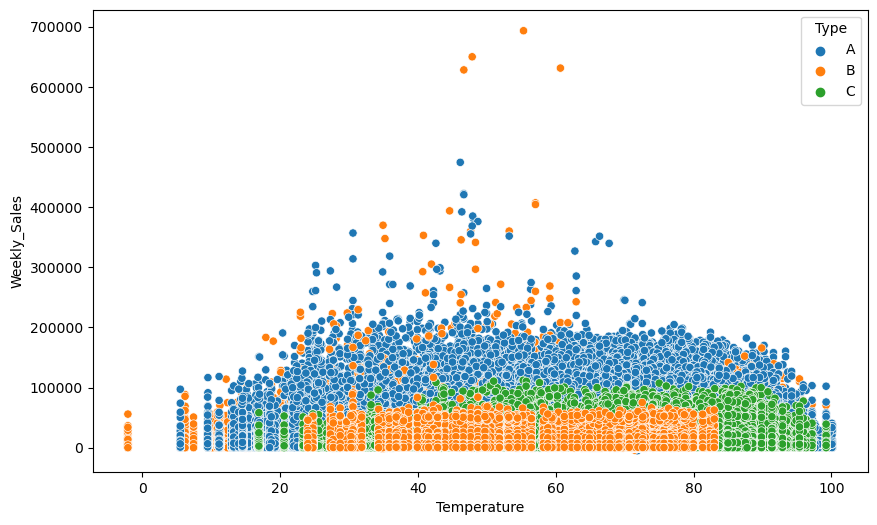

In [35]:
plt.figure(figsize =(10,6))
sns.scatterplot(y='Weekly_Sales',x='Temperature',data=df,hue='Type') #type size sales

<Axes: xlabel='MarkDown1', ylabel='Weekly_Sales'>

<Axes: xlabel='MarkDown1', ylabel='Weekly_Sales'>

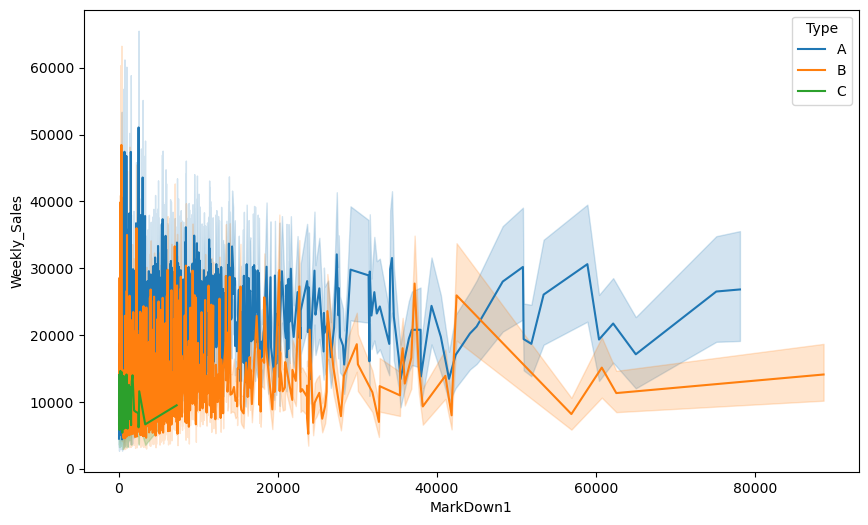

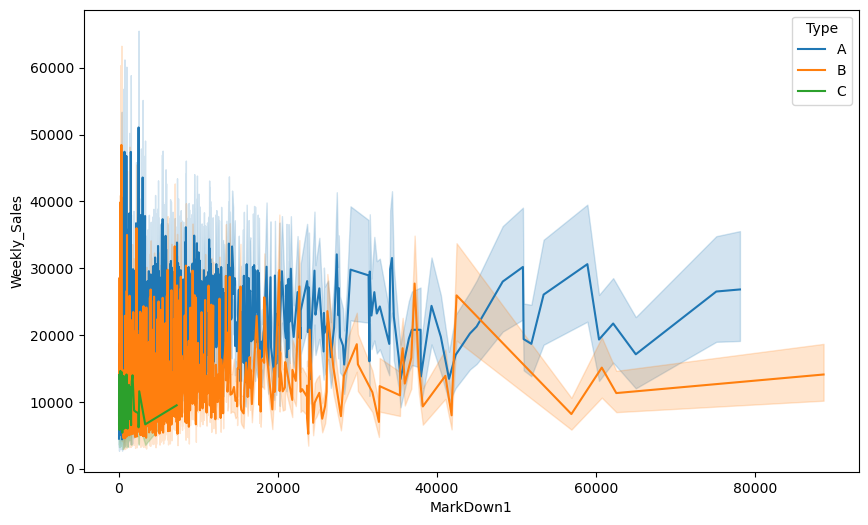

In [36]:
plt.figure(figsize =(10,6))
sns.lineplot(y='Weekly_Sales',x='MarkDown1',data=df,hue='Type') #type size sales

<Axes: xlabel='IsHoliday_True', ylabel='Weekly_Sales'>

<Axes: xlabel='IsHoliday_True', ylabel='Weekly_Sales'>

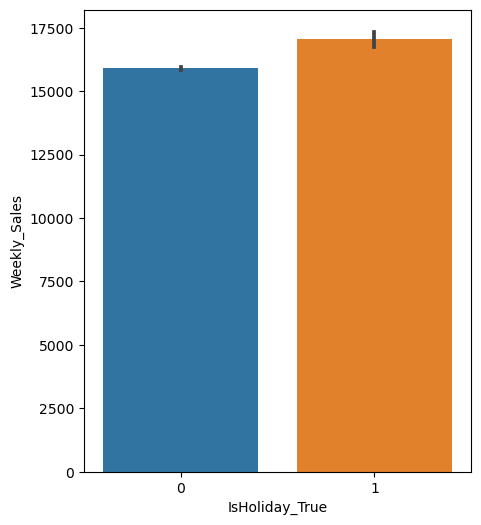

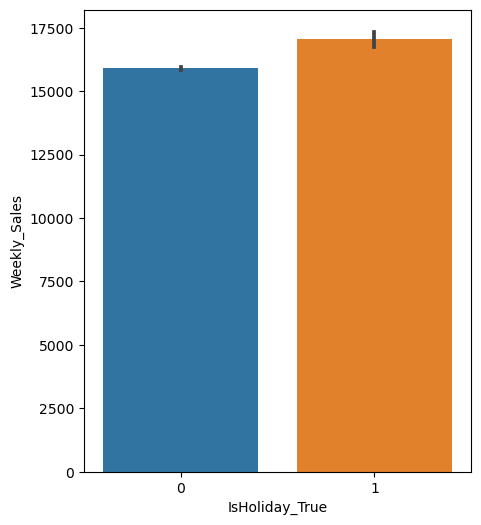

In [37]:
plt.figure(figsize =(5,6))
sns.barplot(y='Weekly_Sales',x='IsHoliday_True',data=df) #holiday ke din ka sales is gr8 

C:\Users\USER\AppData\Local\Temp\ipykernel_1828\1271406288.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()
C:\Users\USER\AppData\Local\Temp\ipykernel_1828\1271406288.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

<Axes: >

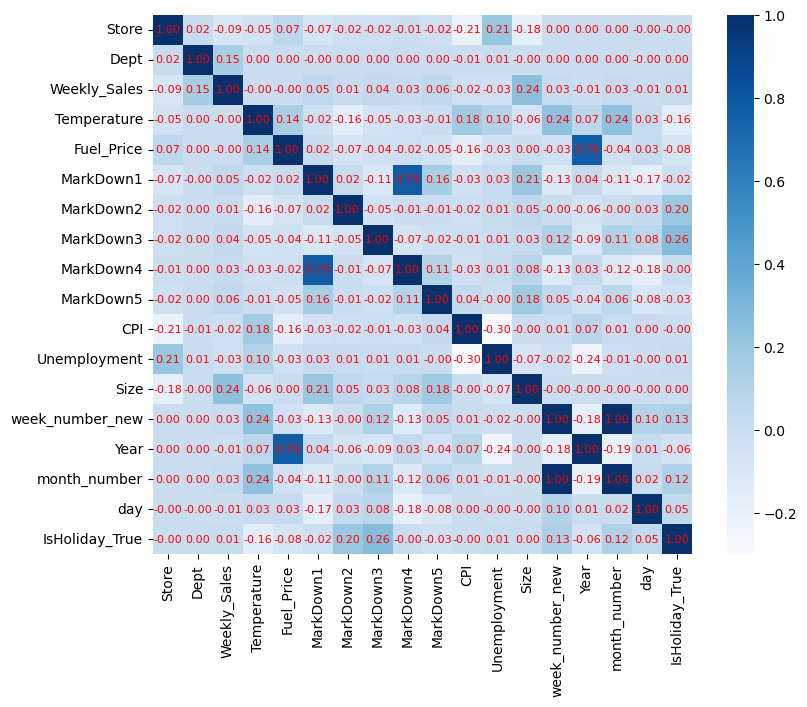

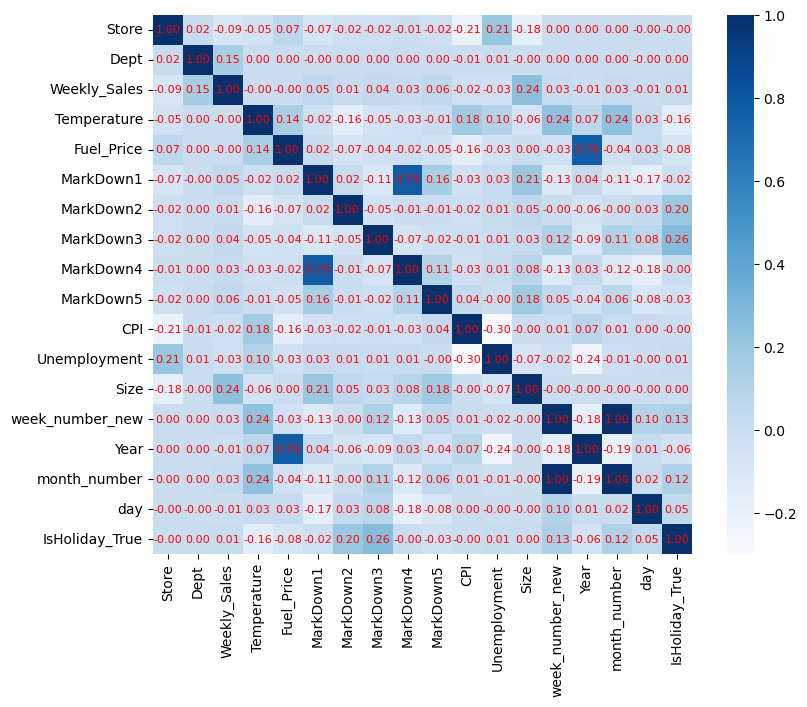

In [38]:
#ANALYZING THE CORRELATION BETWEEN NUMERICAL FEATURES AND WEEKLY SALES USING A HEATMAP
correlation=df.corr() 
plot2=plt.figure(figsize=(9,7))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8,'color':'red'},cmap='Blues')

#FEATURE SELECTION

In [39]:
#df=df.drop(['Year','Unemployment','CPI','MarkDown4','MarkDown2','Temperature','Fuel_Price'],axis=1)

CLEANING

REMOVED THE NULL VALUES

<Axes: >

<Axes: >

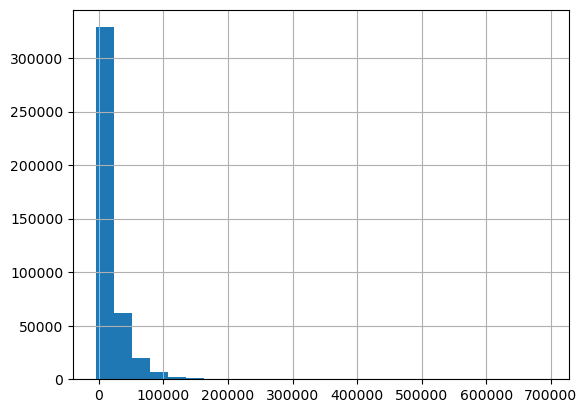

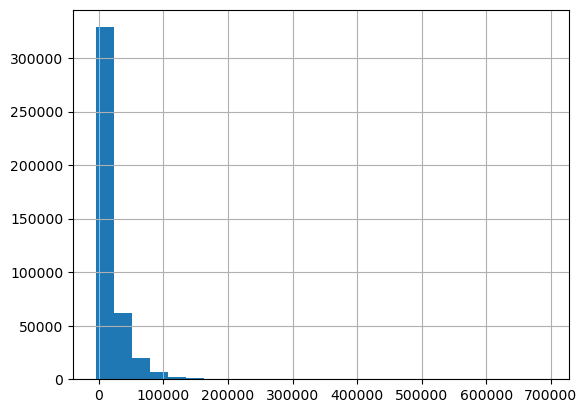

In [40]:
df['Weekly_Sales'].hist(bins=25)

REMOVING OUTLIERS

0         0.393782
1         1.323501
2         1.127829
3         0.150687
4         0.257435
            ...   
421565    0.681290
421566    0.676018
421567    0.656956
421568    0.670210
421569    0.656262
Name: Weekly_Sales, Length: 421570, dtype: float64
0         0.393782
1         1.323501
2         1.127829
3         0.150687
4         0.257435
            ...   
421565    0.681290
421566    0.676018
421567    0.656956
421568    0.670210
421569    0.656262
Name: Weekly_Sales, Length: 421570, dtype: float64


<Axes: >

<Axes: >

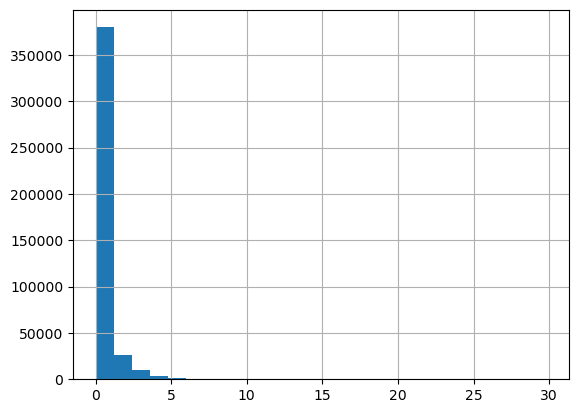

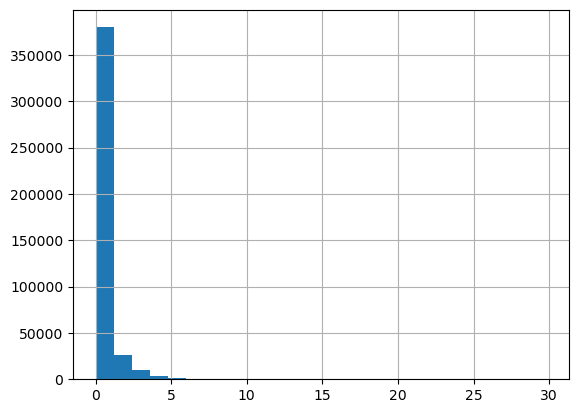

In [41]:
# Z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Weekly_Sales']))
print(z)
z.hist(bins=25)

<Axes: xlabel='IsHoliday_True', ylabel='Weekly_Sales'>

<Axes: xlabel='IsHoliday_True', ylabel='Weekly_Sales'>

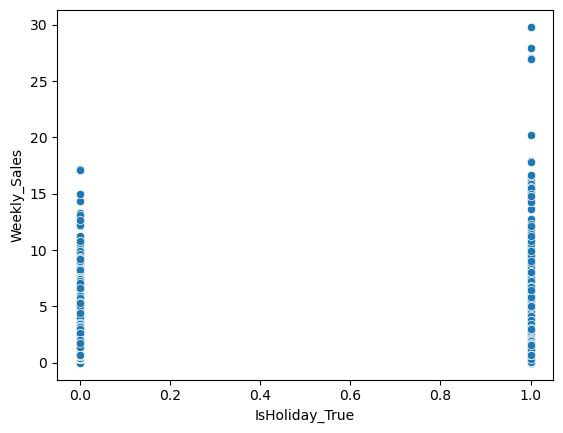

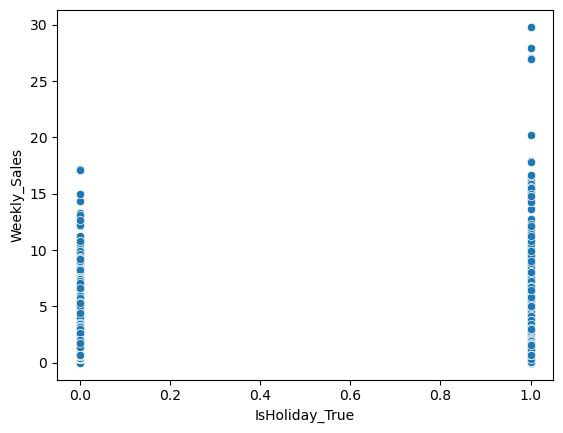

In [42]:
sns.scatterplot(x = 'IsHoliday_True',y =z,data = df)

NORMALIZING DATA

In [43]:
#MIN_MAX
def min_max(array):
    mini=min(array)
    maxi=max(array)
    for i in range(len(array)):
        array[i]=(array[i]-mini)/(maxi-mini)


In [44]:
array=np.asarray(df['Fuel_Price'])
min_max(array)

In [45]:
df['Fuel_log']=pd.DataFrame(array)

<Axes: >

<Axes: >

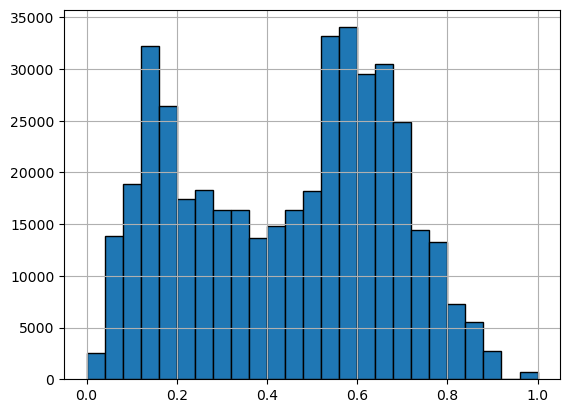

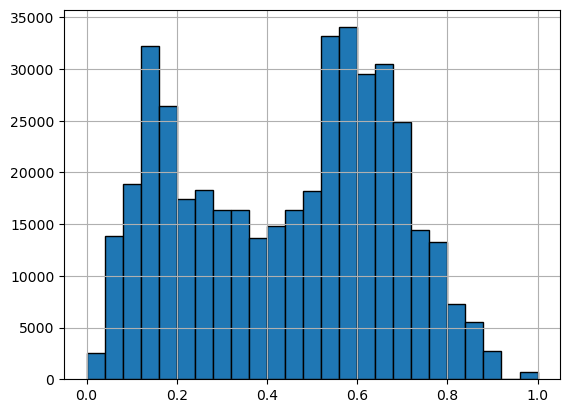

In [46]:
df['Fuel_log'].hist(edgecolor='black',bins=25) #updated histogram

MODEL TRAINING


In [47]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Type,Size,week_number_new,Year,month_number,day,IsHoliday_True,Fuel_log
0,1,1,2010-02-05,24924.50,42.31,0.050100,7246.420196,3334.628621,1439.421384,3383.168256,...,211.096358,8.106,A,151315,5,2010,2,5,0,0.050100
1,1,1,2010-02-12,46039.49,38.51,0.038076,7246.420196,3334.628621,1439.421384,3383.168256,...,211.242170,8.106,A,151315,6,2010,2,12,1,0.038076
2,1,1,2010-02-19,41595.55,39.93,0.021042,7246.420196,3334.628621,1439.421384,3383.168256,...,211.289143,8.106,A,151315,7,2010,2,19,0,0.021042
3,1,1,2010-02-26,19403.54,46.63,0.044589,7246.420196,3334.628621,1439.421384,3383.168256,...,211.319643,8.106,A,151315,8,2010,2,26,0,0.044589
4,1,1,2010-03-05,21827.90,46.50,0.076653,7246.420196,3334.628621,1439.421384,3383.168256,...,211.350143,8.106,A,151315,9,2010,3,5,0,0.076653


,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Type,Size,week_number_new,Year,month_number,day,IsHoliday_True,Fuel_log
0,1,1,2010-02-05,24924.50,42.31,0.050100,7246.420196,3334.628621,1439.421384,3383.168256,...,211.096358,8.106,A,151315,5,2010,2,5,0,0.050100
1,1,1,2010-02-12,46039.49,38.51,0.038076,7246.420196,3334.628621,1439.421384,3383.168256,...,211.242170,8.106,A,151315,6,2010,2,12,1,0.038076
2,1,1,2010-02-19,41595.55,39.93,0.021042,7246.420196,3334.628621,1439.421384,3383.168256,...,211.289143,8.106,A,151315,7,2010,2,19,0,0.021042
3,1,1,2010-02-26,19403.54,46.63,0.044589,7246.420196,3334.628621,1439.421384,3383.168256,...,211.319643,8.106,A,151315,8,2010,2,26,0,0.044589
4,1,1,2010-03-05,21827.90,46.50,0.076653,7246.420196,3334.628621,1439.421384,3383.168256,...,211.350143,8.106,A,151315,9,2010,3,5,0,0.076653


#CONVERTING STRING TO NUMERIC

In [48]:
df['Type'].replace('A',1,inplace=True)
df['Type'].replace('B',0,inplace=True)
df['Type'].replace('C',2,inplace=True)

In [49]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Type,Size,week_number_new,Year,month_number,day,IsHoliday_True,Fuel_log
0,1,1,2010-02-05,24924.50,42.31,0.050100,7246.420196,3334.628621,1439.421384,3383.168256,...,211.096358,8.106,1,151315,5,2010,2,5,0,0.050100
1,1,1,2010-02-12,46039.49,38.51,0.038076,7246.420196,3334.628621,1439.421384,3383.168256,...,211.242170,8.106,1,151315,6,2010,2,12,1,0.038076
2,1,1,2010-02-19,41595.55,39.93,0.021042,7246.420196,3334.628621,1439.421384,3383.168256,...,211.289143,8.106,1,151315,7,2010,2,19,0,0.021042
3,1,1,2010-02-26,19403.54,46.63,0.044589,7246.420196,3334.628621,1439.421384,3383.168256,...,211.319643,8.106,1,151315,8,2010,2,26,0,0.044589
4,1,1,2010-03-05,21827.90,46.50,0.076653,7246.420196,3334.628621,1439.421384,3383.168256,...,211.350143,8.106,1,151315,9,2010,3,5,0,0.076653


,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Type,Size,week_number_new,Year,month_number,day,IsHoliday_True,Fuel_log
0,1,1,2010-02-05,24924.50,42.31,0.050100,7246.420196,3334.628621,1439.421384,3383.168256,...,211.096358,8.106,1,151315,5,2010,2,5,0,0.050100
1,1,1,2010-02-12,46039.49,38.51,0.038076,7246.420196,3334.628621,1439.421384,3383.168256,...,211.242170,8.106,1,151315,6,2010,2,12,1,0.038076
2,1,1,2010-02-19,41595.55,39.93,0.021042,7246.420196,3334.628621,1439.421384,3383.168256,...,211.289143,8.106,1,151315,7,2010,2,19,0,0.021042
3,1,1,2010-02-26,19403.54,46.63,0.044589,7246.420196,3334.628621,1439.421384,3383.168256,...,211.319643,8.106,1,151315,8,2010,2,26,0,0.044589
4,1,1,2010-03-05,21827.90,46.50,0.076653,7246.420196,3334.628621,1439.421384,3383.168256,...,211.350143,8.106,1,151315,9,2010,3,5,0,0.076653


In [50]:
#SPLIT DATASET INTO TRAIN AND TEST
X=df.drop(['Date','Weekly_Sales','Fuel_log'],axis=1) #if droping row axis=0,droping vol axis=1
Y=df['Weekly_Sales']

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [52]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 1234)
decision_tree_regressor.fit(x_train,y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {decision_tree_regressor.score(x_test,y_test)}')

MAE is - 1748.364867044619
RMSE is - 4307.038371536703
Accuracy Score is - 0.9636070632721333
MAE is - 1748.364867044619
RMSE is - 4307.038371536703
Accuracy Score is - 0.9636070632721333


<Axes: xlabel='Weekly_Sales'>

<Axes: xlabel='Weekly_Sales'>

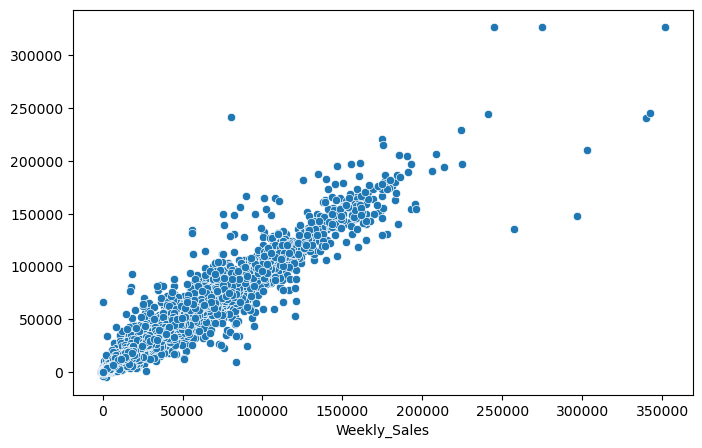

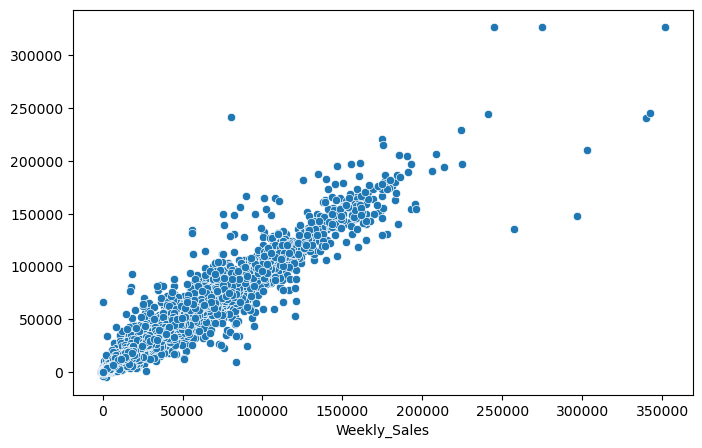

In [53]:
#SCATTER PLOT BETWEEN OBSERVED AND PREDICTED VALUES OF WEEKLY SALES FROM decisionTree REGRESSOR
plt.figure(figsize = (8,5))
sns.scatterplot(x = y_test, y = y_pred)

In [54]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [55]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=3)
X_lle = embedding.fit_transform(X)


ValueError: Error in determining null-space with ARPACK. Error message: 'Factor is exactly singular'. Note that eigen_solver='arpack' can fail when the weight matrix is singular or otherwise ill-behaved. In that case, eigen_solver='dense' is recommended. See online documentation for more information.

ValueError: Error in determining null-space with ARPACK. Error message: 'Factor is exactly singular'. Note that eigen_solver='arpack' can fail when the weight matrix is singular or otherwise ill-behaved. In that case, eigen_solver='dense' is recommended. See online documentation for more information.

In [ ]:
print(X_lle)

# from sklearn.preprocessing import LabelEncoder
Y= LabelEncoder().fit_transform(Y)

# a_train,a_test,y_train,y_test=train_test_split(A,Y,test_size=0.1,random_state=0)

# from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(A)
columns=[]
for i in range(1,11):
    columns.append(i)
PCA_df = pd.DataFrame(data=X_pca, columns = columns)

# PCA_df = pd.concat([PCA_df,df['Weekly_Sales']]) 

In [ ]:
PCA_df.head()

# 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(x_train,y_train)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
regr = MLPRegressor(hidden_layer_sizes=100,learning_rate='adaptive',random_state=3, max_iter=500).fit(x_train,y_train)

In [ ]:
regr.score(x_test,y_test)

In [ ]:
#FEATURE ENGINEERING ON TEST DATA

In [ ]:
df_test = pd.read_csv('C:/Users/USER/Pictures/Data/Wtest.csv')

In [ ]:
dat= pd.to_datetime(df_test['Date'])
# Getting year value
df_test['Year'] = dat.dt.isocalendar().year
df_test['month_number'] = dat.dt.month
df_test['day']= dat.dt.day
#DUMMIES
df_test = pd.get_dummies(df_test, columns=['IsHoliday'])
df_test=df_test.drop('IsHoliday_False',axis=1)

In [ ]:
df_test=df_test.drop('Date',axis=1)

In [ ]:
df_test.head()

In [ ]:
df_test.isnull().sum()

In [ ]:
input_data=(1,1,2012,11,2,0)
input_data_array=np.asarray(input_data)
in_data=input_data_array.reshape(1,-1)
prediction=decision_tree_regressor.predict(in_data)


In [ ]:
print(prediction)